In [30]:
import json
import matplotlib.pyplot as plt

# Load the JSON file
with open('./conv-probe-layers-results/conv1_activation_results.json', 'r') as f:
    iou_results = json.load(f)

# Convert keys from strings to integers
iou_results = {int(k): v for k, v in iou_results.items()}

In [31]:
def plot_all_losses(iou_results, loss_type="train"):
    plt.figure(figsize=(12, 6))

    for channel_idx, channel_data in iou_results.items():
        epochs = range(1, len(channel_data['train_loss']) + 1)
        if loss_type=="train":
            plt.plot(epochs, channel_data['train_loss'], label=f'Train Loss Channel {channel_idx}', alpha=0.7)
        else:
            plt.plot(epochs, channel_data['val_loss'], label=f'Val Loss Channel {channel_idx}', linestyle='--', alpha=0.7)

    plt.title('Loss over Epochs for All Channels')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)  # Adjust legend outside the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

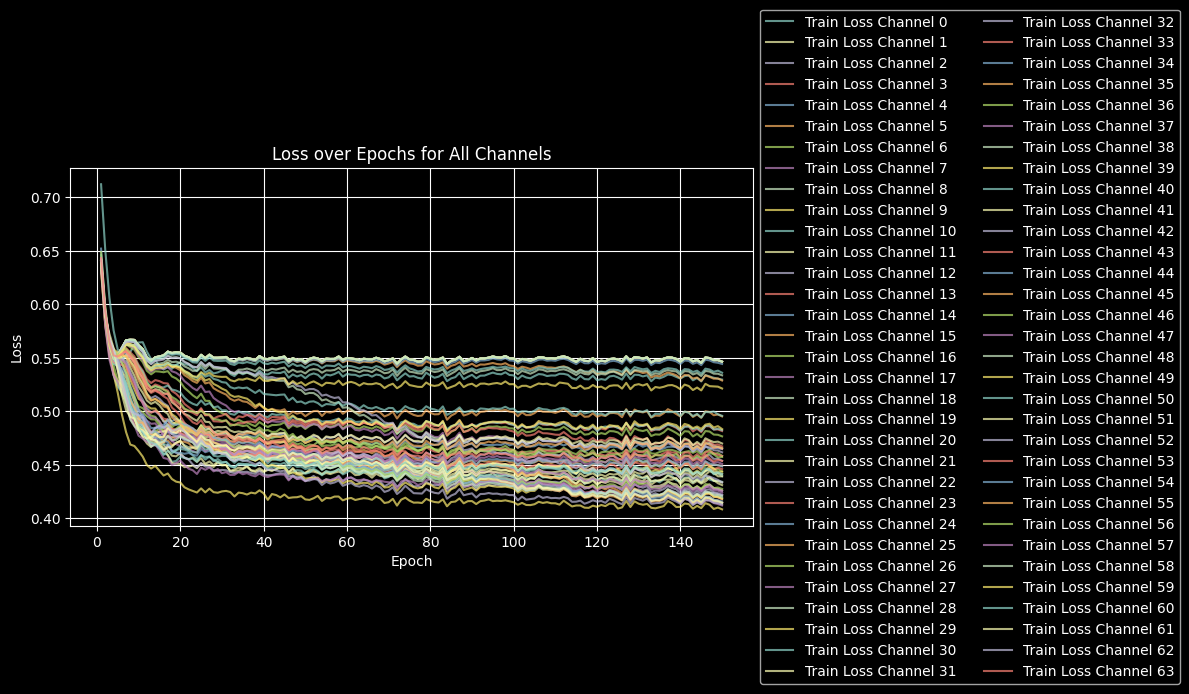

In [32]:
plot_all_losses(iou_results)

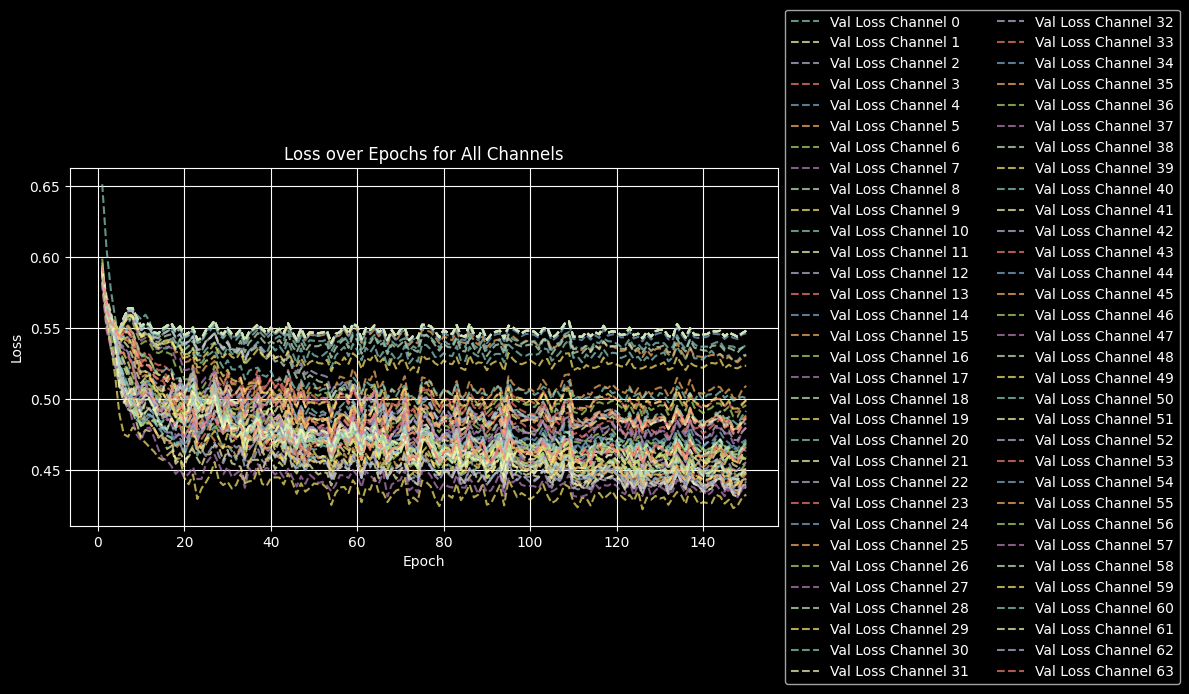

In [33]:
plot_all_losses(iou_results, loss_type="val")

In [34]:
def plot_all_ious(iou_results, iou_type="train"):
    plt.figure(figsize=(12, 6))

    for channel_idx, channel_data in iou_results.items():
        epochs = range(1, len(channel_data['train_iou']) + 1)
        if iou_type == "train":
            plt.plot(epochs, channel_data['train_iou'], label=f'Train IoU Channel {channel_idx}', alpha=0.7)
        else:
            plt.plot(epochs, channel_data['val_iou'], label=f'Val IoU Channel {channel_idx}', linestyle='--', alpha=0.7)

    plt.title('IoU over Epochs for All Channels')
    plt.xlabel('Epoch')
    plt.ylabel('IoU')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)  # Adjust legend outside the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()


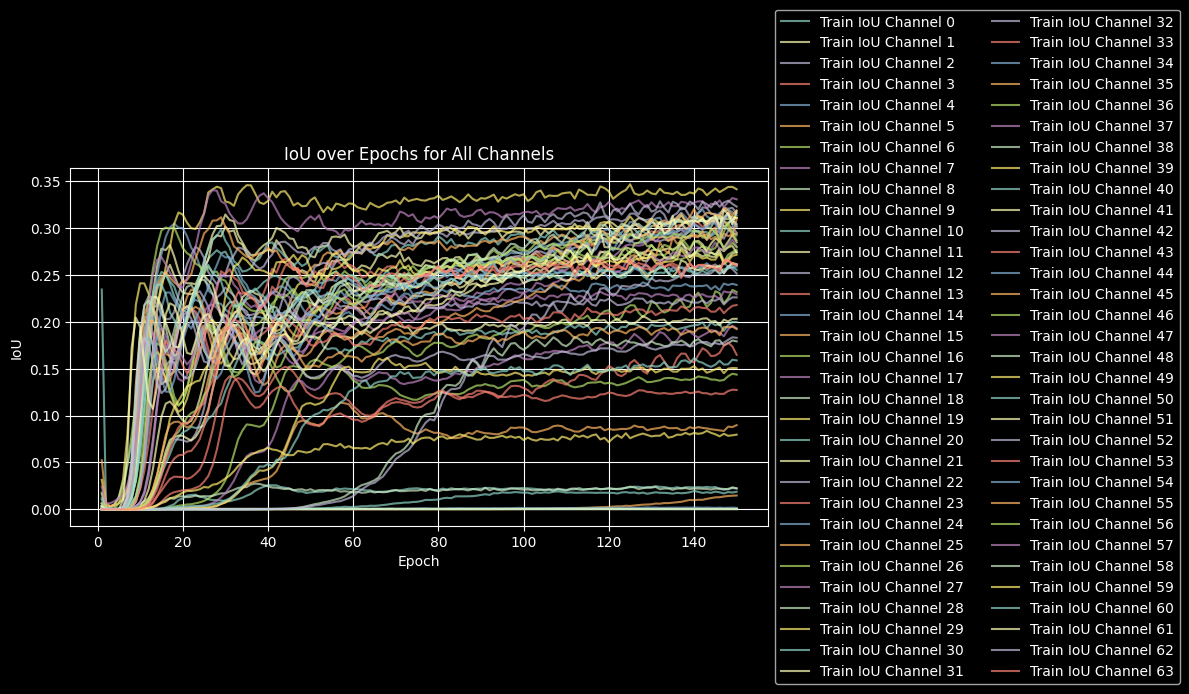

In [35]:
plot_all_ious(iou_results)

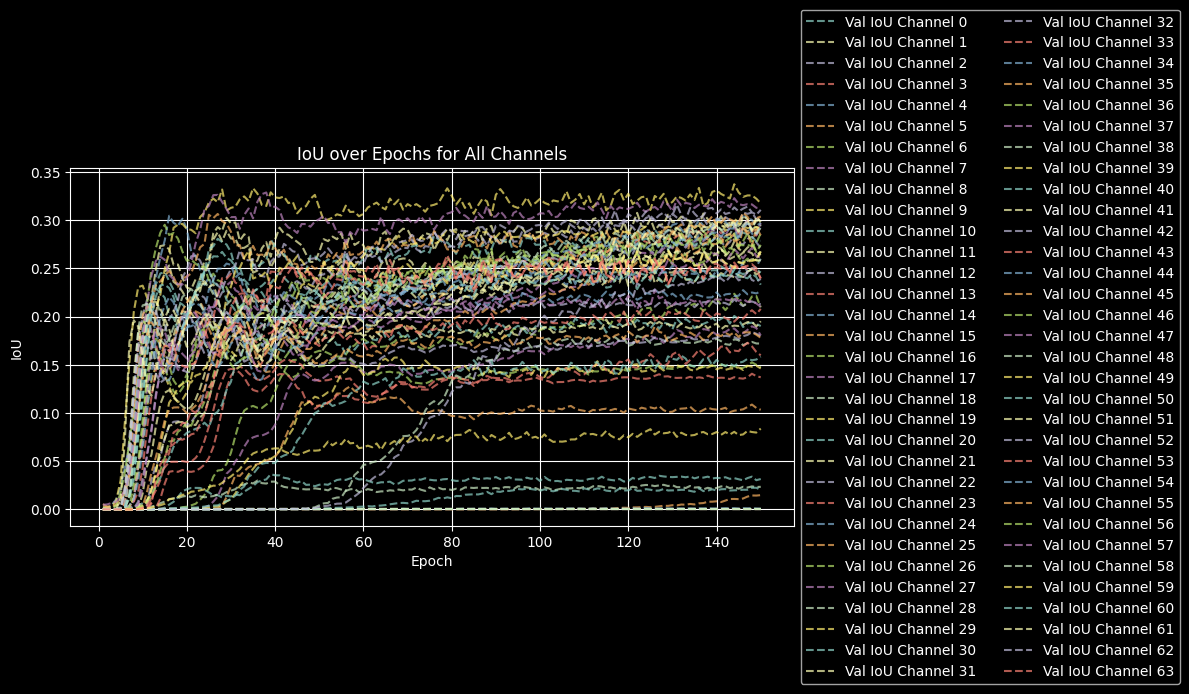

In [36]:
plot_all_ious(iou_results, iou_type="val")

In [37]:
def find_convergence_epoch(losses, threshold=0.001, patience=5):
    best_loss = float('inf')
    epochs_without_improvement = 0
    for epoch, loss in enumerate(losses):
        if best_loss - loss > threshold:
            best_loss = loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= patience:
                return epoch - patience + 1  # Epoch when convergence started
    return len(losses)  # If not converged, return total epochs


In [38]:
convergence_epochs = {}

for channel_idx, channel_data in iou_results.items():
    val_losses = channel_data['val_loss']
    convergence_epoch = find_convergence_epoch(val_losses, threshold=0.001, patience=5)
    convergence_epochs[channel_idx] = convergence_epoch
    print(f'Channel {channel_idx} converged at epoch {convergence_epoch}')


Channel 0 converged at epoch 5
Channel 1 converged at epoch 10
Channel 2 converged at epoch 5
Channel 3 converged at epoch 8
Channel 4 converged at epoch 5
Channel 5 converged at epoch 5
Channel 6 converged at epoch 34
Channel 7 converged at epoch 5
Channel 8 converged at epoch 14
Channel 9 converged at epoch 5
Channel 10 converged at epoch 18
Channel 11 converged at epoch 20
Channel 12 converged at epoch 15
Channel 13 converged at epoch 5
Channel 14 converged at epoch 14
Channel 15 converged at epoch 34
Channel 16 converged at epoch 18
Channel 17 converged at epoch 7
Channel 18 converged at epoch 16
Channel 19 converged at epoch 23
Channel 20 converged at epoch 20
Channel 21 converged at epoch 7
Channel 22 converged at epoch 34
Channel 23 converged at epoch 23
Channel 24 converged at epoch 5
Channel 25 converged at epoch 20
Channel 26 converged at epoch 10
Channel 27 converged at epoch 34
Channel 28 converged at epoch 5
Channel 29 converged at epoch 20
Channel 30 converged at epoch 34

In [39]:
max_val_ious = {channel_idx: max(data['val_iou']) for channel_idx, data in iou_results.items()}

# Sort channels by maximum validation IoU
sorted_channels = sorted(max_val_ious.items(), key=lambda x: x[1], reverse=True)

print("Top 10 Channels by Maximum Validation IoU:")
for idx, (channel_idx, max_iou) in enumerate(sorted_channels[:10]):
    print(f"{idx + 1}. Channel {channel_idx}: Max Validation IoU = {max_iou:.4f}")


Top 10 Channels by Maximum Validation IoU:
1. Channel 19: Max Validation IoU = 0.3372
2. Channel 57: Max Validation IoU = 0.3286
3. Channel 62: Max Validation IoU = 0.3160
4. Channel 22: Max Validation IoU = 0.3080
5. Channel 35: Max Validation IoU = 0.3076
6. Channel 1: Max Validation IoU = 0.3075
7. Channel 25: Max Validation IoU = 0.3064
8. Channel 61: Max Validation IoU = 0.3046
9. Channel 14: Max Validation IoU = 0.3045
10. Channel 34: Max Validation IoU = 0.3039


In [55]:
best_results = {idx[0]: iou_results[idx[0]] for idx in sorted_channels[:10]}